# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
from datetime import datetime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [76]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

623


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [80]:
# Setup the Endpoint url and units
url = "http://api.openweathermap.org/data/2.5/weather"
units = 'imperial'

# Create a dataframe to store results of the calls
column_names = {
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date",
}
cities_df = pd.DataFrame(columns=column_names)

# Loop through each city and call the weather api
params = {
    "appid": weather_api_key,    
    "q": "",
    "units": units,
}

i = 1
skipped = 0

print("-------------------------------")    
print("    Begin processing Cities")
print("-------------------------------")

for city in cities:
    
    # Set up params for the specific city
    params["q"] = city
    
    # Grab the weather for this city from the endpoint
    weather_response = requests.get(url, params).json()
        
    # Check to make sure we got data for each of the cities
    try:
        new_row = {
            "City": city,
            "Lat": weather_response["coord"]["lat"],
            "Lng": weather_response["coord"]["lon"],
            "Max Temp": weather_response["main"]["temp_max"],
            "Humidity": weather_response["main"]["humidity"], 
            "Cloudiness": weather_response["clouds"]["all"],       
            "Wind Speed": weather_response["wind"]["speed"], 
            "Country":weather_response["sys"]["country"], 
            "Date": weather_response["dt"],
        }
        
        # Print and append the row to the dataframe
        print(f"Processing Record {i} of {len(cities)} | {city}")

        cities_df = cities_df.append(new_row, ignore_index=True)

        
    except (KeyError, IndexError):
        # Skip if anything is missing
        print(f"Skipping {city} as field or result was not present ({i})")
        skipped += 1
        
    i += 1

# Print out final proessing stats    
print("--------------------------------------------------------")    
print(f"   Processed {len(cities)} Cities")
print(f"   Skipped {skipped} Cities for lack of information")
print(f"   Leaving {len(cities_df)} to be used")
print("--------------------------------------------------------")    
                

-------------------------------
    Begin processing Cities
-------------------------------
Processing Record 1 of 623 | jamestown
Skipping vaitupu as field or result was not present (2)
Processing Record 3 of 623 | san patricio
Processing Record 4 of 623 | ahipara
Processing Record 5 of 623 | lebu
Processing Record 6 of 623 | arraial do cabo
Processing Record 7 of 623 | albany
Processing Record 8 of 623 | butaritari
Processing Record 9 of 623 | rikitea
Processing Record 10 of 623 | alofi
Processing Record 11 of 623 | annau
Processing Record 12 of 623 | kingsland
Processing Record 13 of 623 | ribeira grande
Processing Record 14 of 623 | khatanga
Processing Record 15 of 623 | carnarvon
Processing Record 16 of 623 | falavarjan
Processing Record 17 of 623 | yerbogachen
Processing Record 18 of 623 | caravelas
Processing Record 19 of 623 | hermanus
Processing Record 20 of 623 | whakatane
Processing Record 21 of 623 | parangan
Processing Record 22 of 623 | hobart
Processing Record 23 of 623 

Processing Record 194 of 623 | new norfolk
Processing Record 195 of 623 | worcester
Processing Record 196 of 623 | fuxin
Processing Record 197 of 623 | petropavlovsk-kamchatskiy
Processing Record 198 of 623 | santa maria
Processing Record 199 of 623 | hithadhoo
Processing Record 200 of 623 | arequipa
Processing Record 201 of 623 | sistranda
Processing Record 202 of 623 | scarborough
Processing Record 203 of 623 | korla
Processing Record 204 of 623 | saint-francois
Processing Record 205 of 623 | mount isa
Processing Record 206 of 623 | hilo
Processing Record 207 of 623 | hofn
Processing Record 208 of 623 | katav-ivanovsk
Processing Record 209 of 623 | cabo san lucas
Processing Record 210 of 623 | leningradskiy
Processing Record 211 of 623 | ukiah
Processing Record 212 of 623 | warmbad
Processing Record 213 of 623 | osakarovka
Processing Record 214 of 623 | trelew
Processing Record 215 of 623 | port augusta
Skipping tlahualilo as field or result was not present (216)
Processing Record 21

Processing Record 392 of 623 | muisne
Processing Record 393 of 623 | hay river
Processing Record 394 of 623 | keita
Processing Record 395 of 623 | mogadishu
Processing Record 396 of 623 | katsuura
Processing Record 397 of 623 | grand-santi
Processing Record 398 of 623 | clyde river
Processing Record 399 of 623 | nurota
Processing Record 400 of 623 | la ronge
Processing Record 401 of 623 | sioux lookout
Processing Record 402 of 623 | gryfino
Processing Record 403 of 623 | aykhal
Processing Record 404 of 623 | porto-vecchio
Processing Record 405 of 623 | beira
Processing Record 406 of 623 | aksu
Processing Record 407 of 623 | roma
Processing Record 408 of 623 | norman wells
Processing Record 409 of 623 | labuhan
Skipping tawkar as field or result was not present (410)
Processing Record 411 of 623 | alta floresta
Processing Record 412 of 623 | chagoda
Processing Record 413 of 623 | massakory
Processing Record 414 of 623 | antalaha
Processing Record 415 of 623 | morondava
Processing Record

Processing Record 591 of 623 | barcelos
Processing Record 592 of 623 | luwuk
Processing Record 593 of 623 | sur
Processing Record 594 of 623 | beyneu
Processing Record 595 of 623 | camopi
Processing Record 596 of 623 | pierre
Processing Record 597 of 623 | clarence town
Processing Record 598 of 623 | kargasok
Processing Record 599 of 623 | upata
Processing Record 600 of 623 | maxixe
Processing Record 601 of 623 | lamu
Processing Record 602 of 623 | dwarka
Processing Record 603 of 623 | rio gallegos
Processing Record 604 of 623 | pervomayskoye
Processing Record 605 of 623 | saryg-sep
Processing Record 606 of 623 | zagan
Processing Record 607 of 623 | simplicio mendes
Processing Record 608 of 623 | tra vinh
Processing Record 609 of 623 | merauke
Processing Record 610 of 623 | katherine
Processing Record 611 of 623 | pretoria
Processing Record 612 of 623 | beitbridge
Processing Record 613 of 623 | alfatar
Processing Record 614 of 623 | kungurtug
Processing Record 615 of 623 | trinidad
Pro

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
# Redorder the columns the way I want them and confirm
cities_df = cities_df[[
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date"
]]
cities_df.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,44.01,87,90,8.05,US,1603995120
1,san patricio,28.02,-97.52,69.80,37,20,20.80,US,1603995419
2,ahipara,-35.17,173.17,58.80,88,100,7.36,NZ,1603995419


In [82]:
# Write the results to a CSV files
cities_df.to_csv(output_data_file, index = False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [38]:
# Check the data types to ensure we have numbers
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity       object
Cloudiness     object
Wind Speed    float64
Country        object
Date           object
dtype: object

In [83]:
# Fix the offending data types and do a describe 
cities_df["Max Temp"] = cities_df["Max Temp"].astype('float')
cities_df["Humidity"] = cities_df["Humidity"].astype('float')
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype('float')
cities_df["Date"] = cities_df["Date"].astype('int')
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,20.584155,14.627931,59.549121,70.622414,50.505172,8.241466,1.603996e+09
std,33.276817,88.093313,22.263364,22.651917,38.246157,5.739320,1.214706e+02
min,-54.800000,-175.200000,-11.200000,9.000000,0.000000,0.200000,1.603995e+09
25%,-7.885000,-61.422500,46.300000,59.750000,8.000000,3.850000,1.603995e+09
50%,27.620000,21.950000,64.400000,77.000000,51.000000,6.930000,1.603996e+09
75%,48.965000,83.035000,77.000000,88.000000,90.000000,11.410000,1.603996e+09
max,78.220000,179.320000,100.940000,100.000000,100.000000,43.620000,1.603996e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [84]:
# Get the indices of cities that have humidity over 100%.
cities_hum_over_100_list = cities_df[cities_df["Humidity"] > 100].index.to_list()
print(cities_hum_over_100_list)

[]


Int64Index([], dtype='int64')

In [85]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(cities_df.index[cities_hum_over_100_list], inplace=False).reset_index(drop=True)
clean_city_data.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,44.01,87.0,90.0,8.05,US,1603995120
1,san patricio,28.02,-97.52,69.80,37.0,20.0,20.80,US,1603995419
2,ahipara,-35.17,173.17,58.80,88.0,100.0,7.36,NZ,1603995419
3,lebu,-37.62,-73.65,54.05,67.0,0.0,21.81,CL,1603995314
4,arraial do cabo,-22.97,-42.03,82.40,88.0,75.0,9.17,BR,1603995273


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [86]:
#
# plot_scatter
#
# Purpose of this function is to render a scatter plot for the given parameters.
# If can optionally calculation and plot linear regression.
# 
# x - x data value series (x and y must be of the same length)
# y - y data value series (x and y must be of the same length)
# x_label - label for the x axis
# y_label - label for the y axis
# title - title for the plot
# marker - marker symbol for the scatter points
# color - marker face color
# edgecolor - marker edge color
# file_name - Optional file name and folder for saving the plot to a file, default is none
# with_regression - Optional flag to determine if regression should be calculated and plotted 
# equation_label_position=(0,0) - Optional position to display the regression label 
#

def plot_scatter(x, y, x_label, y_label, title, marker, color, edgecolor, file_name = None, with_regression = False, equation_label_position=(0,0)):   

    # create the subplot and set display attributes
    fig, ax = plt.subplots()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
    
    # If optional regression flag is set then calculated and plot regression
    if with_regression:

        slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
        regress_values = x * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        print(f"The r-value is: {rvalue}")
        ax.annotate(line_eq, equation_label_position, fontsize=15, color="red")
        ax.plot(x, regress_values, "r-")
    
    
    # plot the scatter
    ax.scatter(x, y, marker=marker, facecolor=color, edgecolor=edgecolor) 
    plt.tight_layout()
    
    # Save the file if file_name specified
    if file_name is not None:
        plt.savefig(f"images/{file_name}.png")
        
    # show the plot    
    plt.show()
    

In [46]:
# Set up some variables to be used across all the plots
now = datetime.now()
analysis_date = now.strftime("%m/%d/%Y")
x_label="Latitude"
max_temp_label = "Max Temperature (F)"
humidity_label = "Humidity (%)"
cloud_label = "Cloudiness (%)"
wind_label = "Wind Speed (MPH)"

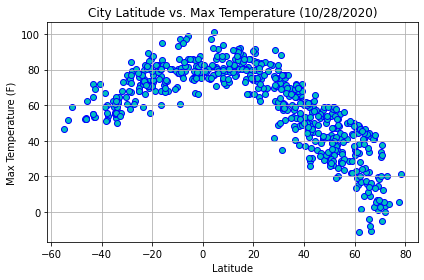

In [87]:
# Plot scatter for City Latitude vs. Max Temperature
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude vs. Max Temperature ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_max_temp"
)


In [88]:
# The intent of the above scatter is to evaluate temperature change over the city latitude change.  
# Here one could say the temperatures in further north (60 thru 80) and south (-40 thru -60) city 
#latitudes are cooler than at the equator (0)

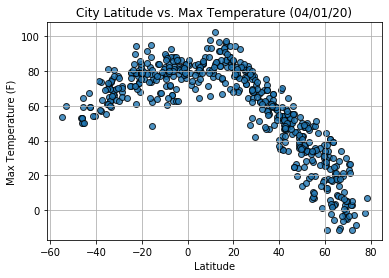

## Latitude vs. Humidity Plot

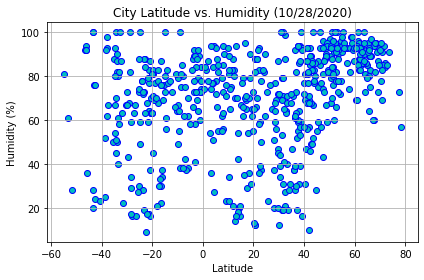

In [89]:
# Plot scatter for City Latitude vs. Humidity
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude vs. Humidity ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_humidity"
)

In [ ]:
# Here we trying to see if city latitude has any relationship with humidity, but this plot is a bit all over the place.
# However there is high concentration of humidity in the northern city latitudes from 45 degress to 85 degrees which
# could indicate some tendency of higher humidity in those locations

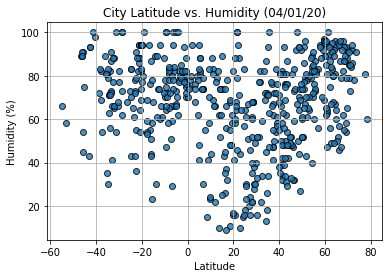

## Latitude vs. Cloudiness Plot

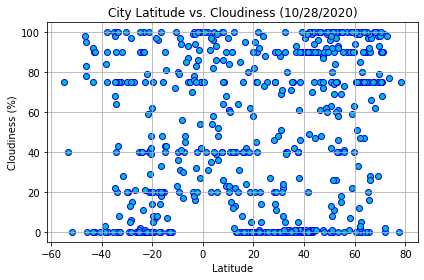

In [90]:
# Plot scatter for City Latitude vs. Cloudiness
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude vs. Cloudiness ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_cloudiness"
)

In [91]:
# Here we are plotting Clouds presence vs latitude, meaning is it more cloudy in some citys vs others 
# lattitude wise. I do see some layering here but is spans the entire lattitude plot so I cannot draw 
# any conclusions.

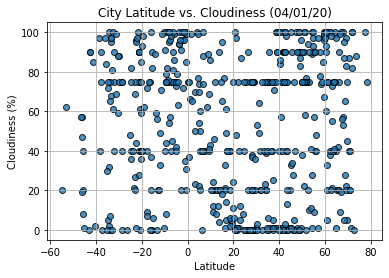

## Latitude vs. Wind Speed Plot

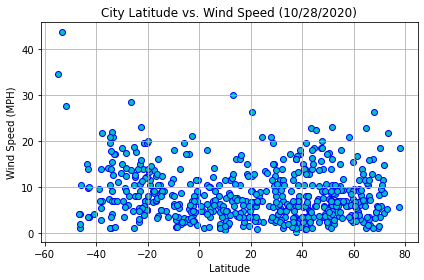

In [112]:
# Plot scatter for City Latitude vs. Wind Speed
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude vs. Wind Speed ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_wind_speed"
)

In [ ]:
# This plot looks at how high the winds are in miles per hour with respect to city latitudes.  
# Again here things look to be evenly distributed and for the most part the majority of 
# locations have winds from 0-10 mph.
#

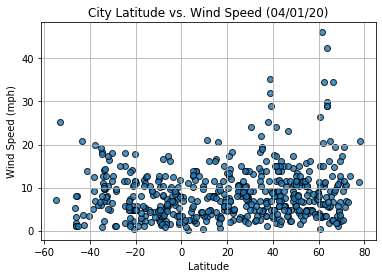

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [93]:
# set up the northern hemisphere data frame to be used for all northern hemisphere plots
northern_hemisphere = clean_city_data[clean_city_data["Lat"] >= 0]

The r-value is: -0.8741360653932942


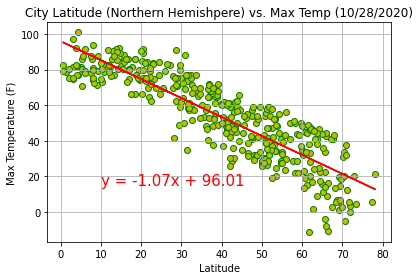

In [94]:
# Plot scatter for City Latitude (Northern Hemishpere) vs. Max Temp w/ Regression
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude (Northern Hemishpere) vs. Max Temp ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_max_temp",
    True,
    (10,15)
)

In [96]:
# This plot shows maximum temperatures vs northern city latitudes, we can certainly see a strong relationship
# by the regresssion that starting from the equator to the north most latitudes the temperature drops!
#

The r-value is: 0.46937863826630627


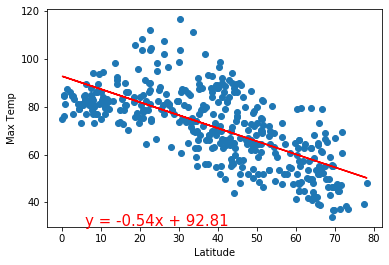

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [97]:
# set up the southern hemisphere data frame to be used for all southern hemisphere plots
southern_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]

The r-value is: 0.719552974213284


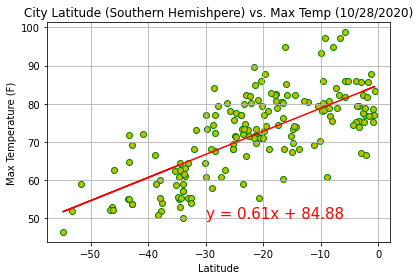

In [98]:
# Plot scatter for City Latitude (Southern Hemishpere) vs. Max Temp w/ Regression
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude (Southern Hemishpere) vs. Max Temp ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_max_temp",
    True,
    (-30,50)
)

In [99]:
# This plot shows maximum temperatures vs southern city latitudes, we see the same pattern as the northern
# hemisphere only in reverse, starting at the equator moving south the temperature drops.
#

The r-value is: 0.6082708688906918


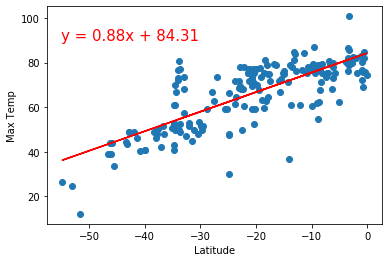

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.40809954367631635


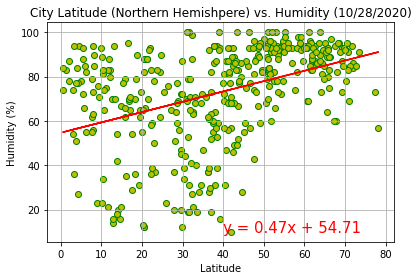

In [101]:
# Plot scatter for City Latitude (Northern Hemishpere) vs. Humidity w/ Regression
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude (Northern Hemishpere) vs. Humidity ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_humidity",
    True,
    (40,10)
)

In [102]:
# This plot shows humidity vs northern city latitudes, what I see here is a slight tendency through 
# regression towards higher humidity the further north you go, but not strong enough of a relationship
# to say it is correlated
#

The r-value is: 0.000543987878808455


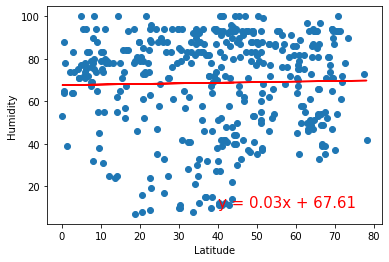

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0840673390543485


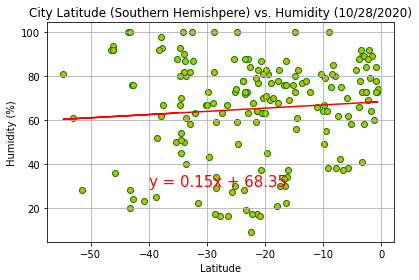

In [103]:
# Plot scatter for City Latitude (Southern Hemishpere) vs. Humidity w/ Regression
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude (Southern Hemishpere) vs. Humidity ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_humidity",
    True,
    (-40,30)
)

In [104]:
# This plot shows humidity vs southern city latitudes, what I see here is a slight tendency through 
# regression towards lower humidity the further south you go, but not strong enough of a relationship
# to say it is correlated
#

The r-value is: 0.014985174297345524


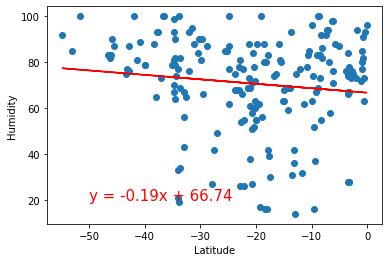

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21897820940436874


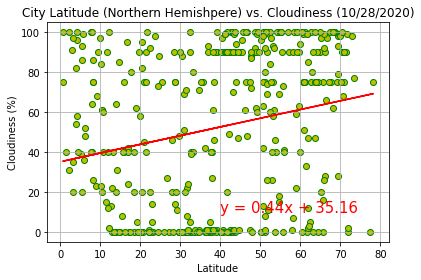

In [105]:
# Plot scatter for City Latitude (Northern Hemishpere) vs. Cloudiness w/ Regression
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude (Northern Hemishpere) vs. Cloudiness ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_cloudiness",
    True,
    (40,10)
)

In [106]:
# This plot shows cloudiness vs northern city latitudes, what I see here is a slight tendency through 
# regression towards higher cloudiness the further north you go, but not strong enough of a relationship
# to say it is correlated
#

The r-value is: 0.0020898727664228514


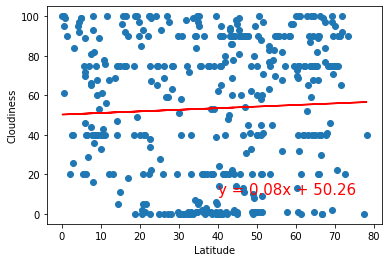

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10150393769764861


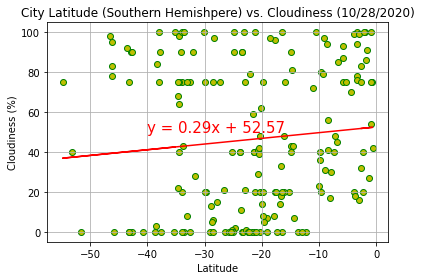

In [107]:
# Plot scatter for City Latitude (Southern Hemishpere) vs. Cloudiness w/ Regression
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude (Southern Hemishpere) vs. Cloudiness ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_cloudiness",
    True,
    (-40,50)
)

In [108]:
# This plot shows cloudiness vs southern city latitudes, what I see here is a slight tendency through 
# regression towards lower cloudiness the further south you go, but not strong enough of a relationship
# to say it is correlated
#

The r-value is: 0.0035263772085582894


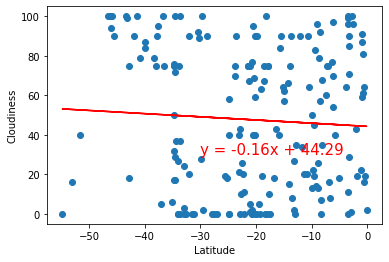

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07466304857136492


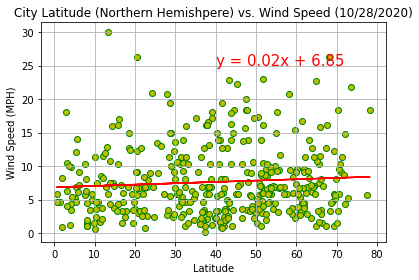

In [111]:
# Plot scatter for City Latitude (Northern Hemishpere) vs. Wind Speed w/ Regression
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude (Northern Hemishpere) vs. Wind Speed ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_wind_speed",
    True,
    (40,25)
)

In [ ]:
# This plot shows wind speed vs northern city latitudes, what I see here is a slight tendency through 
# regression towards higher windiness the further north you go, but not strong enough of a relationship
# to say it is correlated
# However that said there is a pretty high concentration of citys with winds 0-10 mph across the board.

The r-value is: 0.04019723576144484


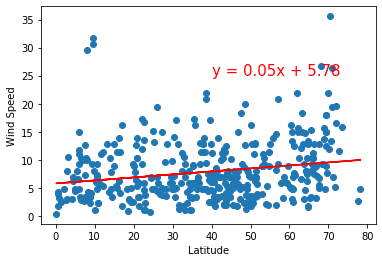

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2866016229617319


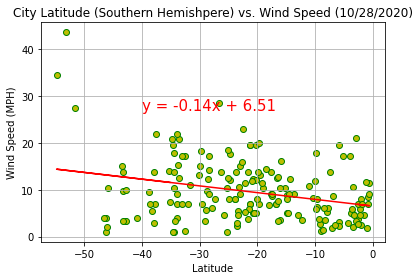

In [113]:
# Plot scatter for City Latitude (Southern Hemishpere) vs. Wind Speed w/ Regression
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude (Southern Hemishpere) vs. Wind Speed ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_wind_speed",
    True,
    (-40,27)
)

In [115]:
# This plot shows wind speed vs southern city latitudes, what I see here is a slight tendency through 
# regression towards higher wind speed the further south you go, but not strong enough of a relationship
# to say it is correlated
# 

The r-value is: 0.017128274759839232


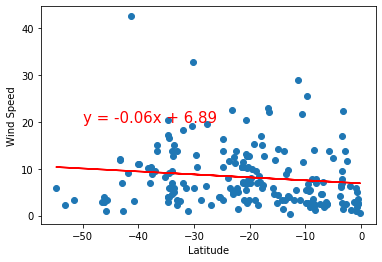